In [1]:
## import general libraries
import numpy as np
import pandas as pd
import re
import json
import glob
# import nltk
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
# from gensim.models import coherencemodel
from APIs.Data_Cleaning import datacleaning, datamapping, datapreprocessing

import nltk
nltk.data.path.append("/home/fibebocai/nltk_data/")
import en_core_web_sm
from nltk.stem import WordNetLemmatizer

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import ray

2022-07-26 11:08:33.027672: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/lsf_10.1.0/10.1/linux3.10-glibc2.17-x86_64/lib:/home/fibebocai/virtualenvs/fibebocai_text/lib/python3.7/site-packages/pyoracleclient/instantclient
2022-07-26 11:08:33.027699: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<font size =5 color="red">Data Processing</font>

In [2]:
"""The oop based class which is responsible for all the data preprocessing needed. If you want to edit more, please find the class
in the APIs folder"""
from APIs.Data_Processing import Data_Processing
from nltk.corpus import stopwords
ticketname = "Data/Ticket Details.xlsx"
stopwords = stopwords.words("english")

# """if you find some words which is causing noise in the topic creation or which are not contributing much in the topic 
# generation then add the word below"""

stopwords.extend(['from', 'subject', 're', 'edu', 'use', 'infineon', 'camstar','com', 'screenshot','yoda','lot','iptester',\
                        "mkz","mkzsapa","mkzsapaxx","site","xml", "total","camstarportal","camstarweb","team","go","gk","gl","alf",\
                        "give","zhouyang","morning","get","getquerytext","ghani","unknown","glue","generate","generation","green",\
                        "afternoon","good","evening","night","user","freeze","full","forward","hello","baby","id", "cannot","unable","add",\
                        "flex", "error message", "error","able","due","mgt","sba","allow","bin","still","workflow","hence","ok","since","critical",\
                        "urgent", "priority", "request","need", "main", "create","would","like","track","must",\
                        "prior","high","find","type","select", "job","fa","type","show", "status",\
                        "contact", "affected","area", "number","server","bth","info","sin","rc","su","mkzpa","attached","za",\
                  "integration","application","equipment"])
lookup ="spellCorrect/lookup.xlsx"
df = pd.read_excel("Data/Ticket Details.xlsx")
a = Data_Processing(df, stopwords, lookup) 
[df_reviews, data_words] = a.getdata()

In [12]:
def getdata():
    return [df_reviews, data_words]
def removespace_lookup(word):
    return word.strip()
def corr_sent(sent):
    texts= sent.split(" ")
    for i in texts:
        if i in worddict.keys():
            sent = sent.replace(i, worddict[i])
    return sent
def gen_words(texts):
    final=[]
    for text in texts:
        new=gensim.utils.simple_preprocess(text,deacc=True)
        final.append(new)
    return (final)
def remove_stopwords(texts, stopwords):
    return [[word for word in simple_preprocess(str(doc)) if word not in \
        stopwords] for doc in texts]
def rem_nondict(sent):
    return  sent #" ".join(w for w in nltk.wordpunct_tokenize(sent) \
            #if w.lower() in self.words or not w.isalpha())
def join_words(l):
    return " ".join(l)
def str_lower(sent):
    words = sent
    new_word=""
    for word in words:
        new_word+=" ".join(word.lower())
    return new_word
def remove_blanks(sent):
    s=""
    for i in sent:
        for j in i:
    #         print(j)
            if j not in ['error message:', ' ', '*site','','contact',"(2) site"]:
                s+=" "+"".join(j)
    s=s.strip()
    return s
def dataextract(sent, patternlist):
    return re.findall(patternlist[0], sent)
def dataextract2(sent):
    return re.sub("(?:((on error\*\:*)* (\(including screenshot of error\)( )*\:*)*))"," ", sent).strip()
def dataextract3(sent):
    return re.sub("\b(?![0-9]+\b)(?![a-z]+\b)[0-9a-z]+\b"," ", sent).strip()
def dataextract4(sent):
    return re.sub("(clf)*(wip(.+?)\ )","", sent).strip()
def dataextract5(sent):
    return re.sub("(\s*\w*(infineon)(.+?)\s)|(\s*\w*(ifx)(.+?)\s)", " ", sent).strip() #|(\s*\w*(lot)(.+?)\s)

In [17]:
df = pd.read_excel("Data/Ticket Details.xlsx")
# df.to_csv("Data/Tickets.csv")
patternlist1=["(?<=problem description)(.*)(?=(\(2\) site))|(?<=problem description)(.*)"]
processed = df.copy()
processed['Desc']=processed["Problem Description"]
processed['Desc'] = processed.Desc.map(lambda x:str_lower(str(x)))
processed['raw'] = processed.Desc.map(lambda x:x.replace("\r",""))
processed['raw'] = processed.raw.map(lambda x:x.replace("\n"," "))
processed['raw'] = processed.raw.map(lambda x:x.replace("\t",""))
processed['raw']=processed.raw.map(lambda x:dataextract(x, patternlist1))
processed['raw'] = processed.raw.map(lambda x:remove_blanks(x))
processed['raw']=processed.raw.map(lambda x:dataextract2(x))
processed['raw']=processed.raw.map(lambda x: re.sub('[,\.!?:()/_-]', ' ', x))
# processed['raw']=processed.raw.map(lambda x:dataextract3(x))
# processed.dropna(subset=["raw"], how ='all', inplace = True)

In [18]:
# patternlist = ["((problem description)|(issue))(.*)(?=((\(2\) site\W)|(site\W)|(equipment name\W)))"]
# re.findall(patternlist[0], df.loc[170].lower())

In [19]:
# l="Missing Test Summary W testmode B21P, Qty 601 & 156"
# processed = l.lower()
# processed = re.sub('[,\.!?:()/_-]', ' ', processed)
# df['raw'] = processed

In [20]:
# # df = pd.DataFrame(columns=["Desc", "raw", "common_worfds"])
# !sudo apt-get install git
processed.raw.loc[1]

'the fajob   za940359m0xspav0420200908134433329 does not belong to this equipment  sptv01'

In [7]:

df_reviews = df_reviews[df_reviews['common_words'].apply(lambda x: len(x)>1)]

In [8]:
df_reviews.to_excel("processed_data.xlsx")

<font size=5 color="red">sklearn LDA Model</font>

<font size=3 color="blue"> Library Imports for the model</font>

In [8]:
""" Libraries relevant to the model only"""
import numpy as np
from sklearn import decomposition
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import gensim.corpora as corpora
import pandas as pd

"""The oop based class which I created for the purpose of training and testing of the LDA model of sklearn"""
from APIs.sklearnLDA import sklearnLDA_NMF


<font size=3 color="blue">Hyperparameters</font>

In [9]:
num_topics = 20
num_words = 10
learning_decay = 0.9
alpha = 0.0001
eta = "default"
learning_method = 'batch'
batch_size = 512
learning_offset = 10
n_top_words = 10
epochs = 200
random_state = 40
ngram_range =(1,3)
max_df = 0.9
min_df = "default"
max_features = 20000
lda_topics = [str(i) for i in range(num_topics)]

""" for saving the hyperparameters"""

h_list = [num_topics, num_words, learning_decay, alpha, eta, learning_method, batch_size, learning_offset,\
         epochs, random_state, ngram_range, max_df, min_df, max_features]
columns = ["num_topics", "num_words","learning_decay", "alpha", "eta", "learning_method",  "batch_size","learning_offset", \
           "epochs",  "random_state", "ngram_range","max_df", "min_df", "max_features","lda","nmf"]
# h_dataframe = pd.DataFrame(np.array(h_list), columns = columns)

<font size=3 color="blue">Model</font>

<font size=3 color = "green">LDA model</font>

In [10]:
title_count = 38

In [11]:
model = "lda"
b = sklearnLDA_NMF.remote(model,df_reviews, learning_decay, alpha, eta, epochs, learning_method, learning_offset, batch_size, num_topics, num_words, random_state, ngram_range,\
         min_df, max_df, max_features)
[lda, vectorizer_cv, X_cv, topics, df_doc_topic, significant_topic] = ray.get(b.topic_gen.remote())
df_topic_table = ray.get(b.table_formatting.remote(df_doc_topic))
df_topic_table.to_excel("Results/df_topic_table_lda_%d.xlsx"%title_count)
ray.get(b.get_model_topics.remote(lda_topics, n_top_words)).to_excel("Topics/topics_lda_%d.xlsx"%title_count)
ray.shutdown()

File descriptor limit 4000 is too low for production servers and may result in connection errors. At least 8192 is recommended. --- Fix with 'ulimit -n 8192'
2022-07-25 08:50:14,361	INFO services.py:1476 -- View the Ray dashboard at http://127.0.0.1:8265
(sklearnLDA_NMF pid=1417752) /home/fibebocai/virtualenvs/fibebocai_text/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
(sklearnLDA_NMF pid=1417752)   warnings.warn(msg, category=FutureWarning)


In [24]:
vectorizer_cv = TfidfVectorizer(analyzer='word',ngram_range=ngram_range, \
            max_df=max_df, max_features = max_features)
X_cv = vectorizer_cv.fit_transform(df_reviews['common_words'][1:3]).toarray()
tfidf_tokens = vectorizer_cv.get_feature_names()
pd.DataFrame(X_cv, columns = tfidf_tokens).to_csv("tf-idftesting.csv")

/home/fibebocai/virtualenvs/fibebocai_text/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<font size=3 color = "green">NMF model</font>

In [18]:
model = "nmf"
b = sklearnLDA_NMF.remote(model,df_reviews, learning_decay, alpha, eta, epochs, learning_method, learning_offset, batch_size, num_topics, num_words, random_state, ngram_range,\
         min_df, max_df, max_features)
[nmf, vectorizer_cv, X_cv, topics, df_doc_topic, significant_topic] = ray.get(b.topic_gen.remote())
df_topic_table = ray.get(b.table_formatting.remote(df_doc_topic))
df_topic_table.to_excel("Results/df_topic_table_nmf_%d.xlsx"%title_count)
ray.get(b.get_model_topics.remote(lda_topics, n_top_words)).to_excel("Topics/topics_nmf_%d.xlsx"%title_count)

2022-07-05 16:36:33,847	WARNING worker.py:917 -- File descriptor limit 4000 is too low for production servers and may result in connection errors. At least 8192 is recommended. --- Fix with 'ulimit -n 8192'
2022-07-05 16:36:36,425	INFO services.py:1476 -- View the Ray dashboard at http://127.0.0.1:8265
(sklearnLDA_NMF pid=1865085) /home/fibebocai/virtualenvs/fibebocai_text/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
(sklearnLDA_NMF pid=1865085)   FutureWarning,
(sklearnLDA_NMF pid=1865085) /home/fibebocai/virtualenvs/fibebocai_text/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
(sklearnLDA_NMF pid=1865085)   ConvergenceWarning,
(sklearnLDA_NMF pid=1865085) /home/fibebocai/virtualenvs/fibebocai_text/lib/python3.7/site-packages/sklearn/util

<font size=3 color = "green">Saving the Hyperparamters</font>

In [19]:
import csv
h_list.append("topic_lda_%d"%title_count)
h_list.append("topic_nmf_%d"%title_count)
f = open('hyperparameters.csv', 'a', newline='')
writer= csv.writer(f)
# writer.writerow(columns)
writer.writerow(h_list)
f.close()

In [ ]:
<font size=3 color="blue">Testing With The Subcategories</font>

In [13]:
df_test = pd.read_excel("Data/test_data_jcbe.xlsx", usecols=['Ticketid','Problem Desc']).loc[0]

# df_test["topics"] = df_test.desc.map(lambda x:b.get_inference(lda_topics, x,0))
# df_test.to_excel("Data/test_result.xlsx")
# count = 0
# for i in range(df_test.shape[0]):
#     if df_test['topics'].loc[i]=="2" or df_test['topics'].loc[i]=='1':
#         count+=1
# count/df_test.shape[0]*100

In [ ]:
df_test = pd.read_excel("Data/eaf_test.xlsx")
df_test["topics"] = df_test.desc.map(lambda x:b.get_inference(lda_topics, x,0))
df_test.to_excel("Data/test_result_eaf.xlsx")

In [ ]:
count = 0
for i in range(df_test.shape[0]):
    if df_test['topics'].loc[i]=="5" or df_test['topics'].loc[i]=='10' or df_test['topics'].loc[i]=='3':
        count+=1
count/df_test.shape[0]*100

<font size =5 color="red">Cluster Transformer</font>

In [3]:
import ClusterTransformer.ClusterTransformer as ctrans
import pandas as pd

cr = ctrans.ClusterTransformer()
model_name = "allenai/longformer-base-4096"

<font size=3 color="blue">Hyperparameters</font>

In [8]:
batch_size = 10
max_seq_length = 64
convert_to_numpy = False
normalize_embeddings = False
neighborhood_min_size = 1
cutoff_threshold = 0.83
kmeans_max_iter = 100
kmeans_random_state = 42
kmeans_no_cluster = 6
li_sentence = df_reviews['common_words'][:100]

<font size=3 color="blue">Model</font>

Some weights of the model checkpoint at allenai/longformer-base-4096 were not used when initializing LongformerModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing LongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at allenai/longformer-base-4096 were not used when initializing LongformerModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS

DataFrame from neighborhood detection:
     Cluster                                               Text
0         0                                       fajob belong
1         0   trackout ndpw item quantityity match quantityity
2         0                              strip map quantityity
3         0                                     miss next step
4         0              target step could determine container
..      ...                                                ...
95        0  print tag department issue rtr test assembly p...
96        0                                          print tag
97        0  trackin trackout button grey fajob transaction...
98        0  try export excel file tool management open but...
99        0  print edikette message tag also print tag prin...

[100 rows x 2 columns]
DataFrame from Kmeans detection:
     Cluster                                               Text
0         1                                       fajob belong
1         1   tracko

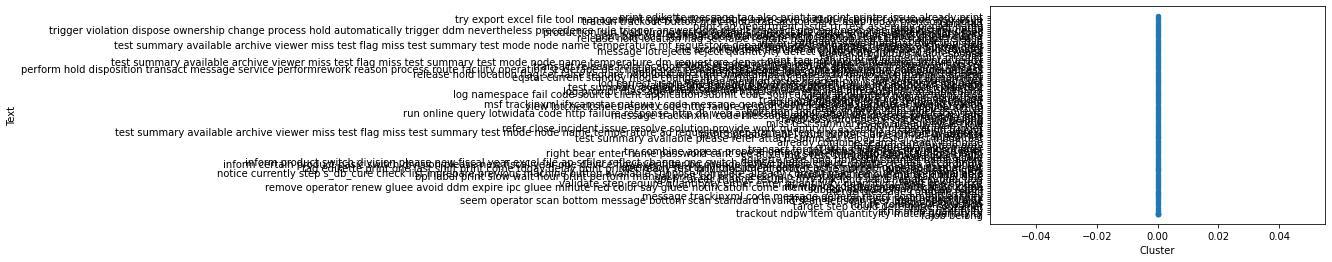

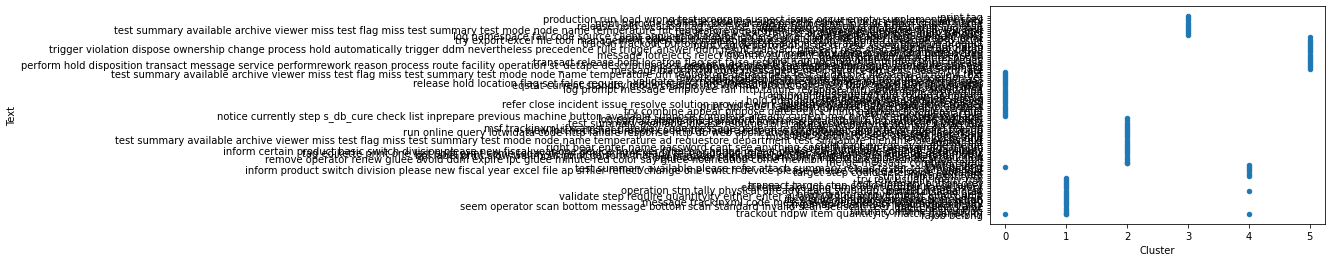

In [9]:
embeddings = cr.model_inference(li_sentence, batch_size, model_name, max_seq_length, normalize_embeddings, convert_to_numpy)
output_dict = cr.neighborhood_detection(li_sentence, embeddings, cutoff_threshold, neighborhood_min_size)
output_kmeans_dict = cr.kmeans_detection(li_sentence, embeddings, kmeans_no_cluster, kmeans_max_iter, kmeans_random_state)
neighborhood_detection_df = cr.convert_to_df(output_dict)
kmeans_df = cr.convert_to_df(output_kmeans_dict)
print(f'DataFrame from neighborhood detection:\n {neighborhood_detection_df}')
print(f'DataFrame from Kmeans detection:\n {kmeans_df}')
cr.plot_cluster(neighborhood_detection_df)
cr.plot_cluster(kmeans_df)